<a href="https://colab.research.google.com/github/josegabrielguerrero26/CSE450-machinelearning/blob/main/project3/starter_bikesv3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Title: Neural Network

**Reading Meterial:**

https://byui-cse.github.io/cse450-course/module-04/reading.html#practical

# Case Study

https://byui-cse.github.io/cse450-course/module-04/intro.html

**Introduction**

WelcomeBike Bike Rentals is a Beijing-based bike rental company that has recently expanded to include a handful of US locations. You've been asked to build a neural network that will predict the number of bike rentals for a given day and hour for their Washington DC branch.

<br><br>
**Stakeholders**

These are the individuals your team will be helping during the case study:


*ZHAO, CEO OF WELCOMEBIKE*<br>
Our new DC branch is taking off again after COVID-19. I'm excited to see how machine learning can help us to avoid the mistakes of our competitors and prove to our investors that we have a winning business model.


*WILLIAM, INVESTMENT BANKER*<br>
Oh...it's you again.

Nearly every Chinese bike rental business anyone has invested in has gone bankrupt.

Mr. Zhao seems to think that AI can make all the difference, and our bank's investment board is curious to find out if he's right.

I'm here by their request to witness his failure—I mean, to see how it goes.


*JOHNNY, DATA SCIENCE INTERN*<br>
Hey, small world!

I'm visiting my grandma Peggy in Langley, Virginia and thought I'd stop by the capital and see how you're doing.
<br><br>
**STAKEHOLDER FOCUS AREAS**

The stakeholders are particularly interested in the following areas:

Building a neural network that can predict the number of bicycle rentals for a given day.
Understanding how weather, holidays, and other factors affect revenue.

# Questions


**NETWORK LAYERS AND HYPERPARAMETERS**

ZHAO, CEO OF WELCOMEBIKE
My brother-in-law works for a big AI company in Hong Kong. We've chatted a bit about neural networks, and I was wondering how many layers you think the network should have.

If you run your model on the data and the results seem lower than you expected, which of the following hyperparameters do you feel has the most potential for model improvement?

- Number of neurons and number of hidden layers.
- Learning rate and optimizer selection.
- Batch size and number of epochs.
- Activation functions of the layers and overall loss function.<br><br>

**FEATURE ENGINEERING**

JOHNNY, DATA SCIENCE INTERN<br>
Looking at the features we have, how do you think we should handle the temperature features?<br><br>

**LEARNING RATE**

ZHAO, CEO OF WELCOMEBIKE<br>
My brother-in-law told me that I should be careful with how I handle learning rate in my network.

What approach do you think you're going to take to find the optimal learning rate?<br><br>

**LOSS FUNCTION**

JOHNNY, DATA SCIENCE INTERN<br>

How will we know if our model has strong predictive power?

What are you planning to use for the loss function?<br><br>

**PREDICTIVE RISK MODEL**

WILLIAM, INVESTMENT BANKER

We would like use AI to predict the likelihood of damage based on user profile data, such as name, birthday, sex, or address, so that we can add an insurance premium to the rental cost. We are concerned that there may be ethical/legal implications here, what would you recommend?

Based on your initial analysis of the data, your team feels:

We can do this, as long as the users have provided that profile data and we have kept record of previous damages.
Using any profile data in this way would be inappropriate.
As long as we only use name and address, that would be fine.
Instead of using their profile data, we could track their usage via GPS and feed those live statistics (speed, angle, direction) into the model and deactivate the bike if the model predicts they will damage the bike. (For example, if they were going extremely fast down a crowded sidewalk.)<br><br>

**PANDEMIC AND HEALTH CONCERNS**

ZHAO, CEO OF WELCOMEBIKE
Coming out of the pandemic has put a strain on resources. Our customers are much more concerned about health and safety of sharing bikes.

In your executive summary, would you add your recommendations for when we could pull bikes out of rotation to clean and disinfect them? For example, what days and times we should bring them in?

We also need to know if we have any lasting problems now that we are a few years past COVID-19. What can we expect for forcasts into the future? Are we back on track or still recovering?

# Data Information

- Data:
https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/bikes.csv
- Dictionary:https://byui-cse.github.io/cse450-course/module-04/bikes-dictionary.txt

# Loading Data and Libraries

In [1]:
#pip install scikeras[tensorflow-cpu]

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
from tensorflow.keras.layers import Dropout, Dense
from tensorflow.keras.layers.experimental import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

df = pd.read_csv('https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/bikes.csv')
dic= pd.read_csv('https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/bikes_december.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112487 entries, 0 to 112486
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   dteday        112487 non-null  object 
 1   hr            112474 non-null  float64
 2   casual        112487 non-null  int64  
 3   registered    112487 non-null  int64  
 4   temp_c        112487 non-null  float64
 5   feels_like_c  112487 non-null  float64
 6   hum           112487 non-null  float64
 7   windspeed     112487 non-null  float64
 8   weathersit    112487 non-null  int64  
 9   season        112487 non-null  int64  
 10  holiday       112487 non-null  int64  
 11  workingday    112487 non-null  int64  
dtypes: float64(5), int64(6), object(1)
memory usage: 10.3+ MB


In [4]:
pd.set_option('display.max_columns', None)
df.head(5)

,dteday,hr,casual,registered,temp_c,feels_like_c,hum,windspeed,weathersit,season,holiday,workingday
0,1/1/2011,0.0,3,13,3.0,3.0,0.7957,0.8,1,1,0,0
1,1/1/2011,1.0,8,30,1.7,1.7,0.8272,0.8,1,1,0,0
2,1/1/2011,2.0,5,26,1.9,1.9,0.8157,1.1,1,1,0,0
3,1/1/2011,3.0,3,9,2.5,2.5,0.7831,0.8,1,1,0,0
4,1/1/2011,4.0,0,1,2.0,2.0,0.8075,1.1,1,1,0,0


In [5]:
dic.head(5)

,dteday,hr,temp_c,feels_like_c,hum,windspeed,weathersit,season,holiday,workingday
0,11/1/2023,0,6.0,3.8,0.6359,10.8,1,4,0,1
1,11/1/2023,1,6.0,3.4,0.6333,12.7,1,4,0,1
2,11/1/2023,2,5.3,2.6,0.6598,12.0,1,4,0,1
3,11/1/2023,3,5.1,3.8,0.6636,6.3,1,4,0,1
4,11/1/2023,4,4.0,1.8,0.7192,8.4,1,4,0,1


# Cleaning and Transformation Data

In [6]:
from datetime import date
df['dteday']= pd.to_datetime(df['dteday'])

In [7]:
df.isna().sum()

dteday           0
hr              13
casual           0
registered       0
temp_c           0
feels_like_c     0
hum              0
windspeed        0
weathersit       0
season           0
holiday          0
workingday       0
dtype: int64

In [8]:
df.dropna(inplace=True)


In [9]:
df['weathersit'].unique()

array([1, 2, 3, 4])

In [10]:
#df['season'] = df['season'].map({1: 'winter', 2: 'spring', 3: 'summer', 4: 'fall'})

In [11]:
#df = pd.get_dummies(df, columns=['season'], prefix='', prefix_sep='')
df.tail()

,dteday,hr,casual,registered,temp_c,feels_like_c,hum,windspeed,weathersit,season,holiday,workingday
112482,2023-10-31,19.0,241,594,10.2,10.2,0.4516,8.4,2,4,0,1
112483,2023-10-31,20.0,171,450,8.9,7.5,0.5268,9.3,1,4,0,1
112484,2023-10-31,21.0,176,402,7.7,6.4,0.5756,7.8,1,4,0,1
112485,2023-10-31,22.0,106,257,8.0,8.0,0.5604,0.0,1,4,0,1
112486,2023-10-31,23.0,78,135,6.5,6.5,0.6401,4.5,1,4,0,1


In [12]:
df['df_day'] = df['dteday'].dt.day
df['df_month'] = df['dteday'].dt.month
df['df_year'] = df['dteday'].dt.year
df['df_weekday'] = df['dteday'].dt.weekday

In [13]:
df['sum']=df['casual']+df['registered']

In [14]:
df

,dteday,hr,casual,registered,temp_c,feels_like_c,hum,windspeed,weathersit,season,holiday,workingday,df_day,df_month,df_year,df_weekday,sum
0,2011-01-01,0.0,3,13,3.0,3.0,0.7957,0.8,1,1,0,0,1,1,2011,5,16
1,2011-01-01,1.0,8,30,1.7,1.7,0.8272,0.8,1,1,0,0,1,1,2011,5,38
2,2011-01-01,2.0,5,26,1.9,1.9,0.8157,1.1,1,1,0,0,1,1,2011,5,31
3,2011-01-01,3.0,3,9,2.5,2.5,0.7831,0.8,1,1,0,0,1,1,2011,5,12
4,2011-01-01,4.0,0,1,2.0,2.0,0.8075,1.1,1,1,0,0,1,1,2011,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112482,2023-10-31,19.0,241,594,10.2,10.2,0.4516,8.4,2,4,0,1,31,10,2023,1,835
112483,2023-10-31,20.0,171,450,8.9,7.5,0.5268,9.3,1,4,0,1,31,10,2023,1,621
112484,2023-10-31,21.0,176,402,7.7,6.4,0.5756,7.8,1,4,0,1,31,10,2023,1,578
112485,2023-10-31,22.0,106,257,8.0,8.0,0.5604,0.0,1,4,0,1,31,10,2023,1,363


In [15]:
df.drop(['casual', 'registered', 'dteday'], axis=1)

,hr,temp_c,feels_like_c,hum,windspeed,weathersit,season,holiday,workingday,df_day,df_month,df_year,df_weekday,sum
0,0.0,3.0,3.0,0.7957,0.8,1,1,0,0,1,1,2011,5,16
1,1.0,1.7,1.7,0.8272,0.8,1,1,0,0,1,1,2011,5,38
2,2.0,1.9,1.9,0.8157,1.1,1,1,0,0,1,1,2011,5,31
3,3.0,2.5,2.5,0.7831,0.8,1,1,0,0,1,1,2011,5,12
4,4.0,2.0,2.0,0.8075,1.1,1,1,0,0,1,1,2011,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112482,19.0,10.2,10.2,0.4516,8.4,2,4,0,1,31,10,2023,1,835
112483,20.0,8.9,7.5,0.5268,9.3,1,4,0,1,31,10,2023,1,621
112484,21.0,7.7,6.4,0.5756,7.8,1,4,0,1,31,10,2023,1,578
112485,22.0,8.0,8.0,0.5604,0.0,1,4,0,1,31,10,2023,1,363


In [16]:
df_numerical = df[['temp_c', 'hum', 'windspeed', 'sum']]

#sns.pairplot(df_numerical)
#plt.show()

In [17]:
df_categorical = df[['season', 'df_year', 'df_month', 'holiday', 'df_weekday',
                               'workingday', 'weathersit']]

In [18]:
one_hot = OneHotEncoder()
df_categorical = one_hot.fit_transform(df_categorical).toarray()
df_categorical = pd.DataFrame(df_categorical)


In [19]:
df_categorical.reset_index(drop=True, inplace=True)
df_numerical.reset_index(drop=True, inplace=True)

In [20]:
concatenated_df = pd.concat([df_categorical, df_numerical], axis=1)


In [21]:
df_onehot=concatenated_df
df_onehot

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,temp_c,hum,windspeed,sum
0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,3.0,0.7957,0.8,16
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.7,0.8272,0.8,38
2,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.9,0.8157,1.1,31
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,2.5,0.7831,0.8,12
4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,2.0,0.8075,1.1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112469,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,10.2,0.4516,8.4,835
112470,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,8.9,0.5268,9.3,621
112471,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,7.7,0.5756,7.8,578
112472,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,8.0,0.5604,0.0,363


In [22]:
X = df_onehot.iloc[:, :-1].values
y = df_onehot.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)

print(X_train.shape)
print(X_test.shape)


(95602, 47)
(16872, 47)


# Neuro Network Model

In [23]:
neural_regressor = tf.keras.models.Sequential()

neural_regressor.add(tf.keras.layers.Dense(units=10, activation='relu',
                                           input_shape=(47,)))
neural_regressor.add(tf.keras.layers.Dense(units=200, activation='relu'))
neural_regressor.add(tf.keras.layers.Dense(units=60, activation='relu'))
neural_regressor.add(tf.keras.layers.Dense(units=1, activation='linear'))

neural_regressor.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                480       
                                                                 
 dense_1 (Dense)             (None, 200)               2200      
                                                                 
 dense_2 (Dense)             (None, 60)                12060     
                                                                 
 dense_3 (Dense)             (None, 1)                 61        
                                                                 
Total params: 14801 (57.82 KB)
Trainable params: 14801 (57.82 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [24]:
neural_regressor.compile(optimizer=tf.optimizers.Adam(0.01), loss='mse')
#neural_regressor.compile(optimizer=tf.optimizers.SGD(0.1#, 0.9), loss='mse')

In [25]:
batch_size = len(X_train) // 20
early_stopping_callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                           patience=20)

In [26]:
epochs_info = neural_regressor.fit(X_train,
                                   y_train,
                                   epochs=1000,
                                   batch_size=batch_size,
                                   validation_split=0.15,
                                   callbacks=[early_stopping_callback])

Epoch 1/1000
18/18 [==============================] - 2s 26ms/step - loss: 156360.9688 - val_loss: 95943.9453
Epoch 2/1000
18/18 [==============================] - 0s 19ms/step - loss: 97353.0859 - val_loss: 92644.0547
Epoch 3/1000
18/18 [==============================] - 0s 16ms/step - loss: 97929.6797 - val_loss: 96362.3281
Epoch 4/1000
18/18 [==============================] - 0s 17ms/step - loss: 92961.0781 - val_loss: 90532.1094
Epoch 5/1000
18/18 [==============================] - 0s 16ms/step - loss: 88555.5000 - val_loss: 87790.4688
Epoch 6/1000
18/18 [==============================] - 0s 17ms/step - loss: 86476.3906 - val_loss: 85671.3828
Epoch 7/1000
18/18 [==============================] - 0s 19ms/step - loss: 84119.2656 - val_loss: 83659.9375
Epoch 8/1000
18/18 [==============================] - 0s 17ms/step - loss: 85278.5703 - val_loss: 84979.1094
Epoch 9/1000
18/18 [==============================] - 0s 16ms/step - loss: 86127.5078 - val_loss: 82280.1172
Epoch 10/1000
18/1

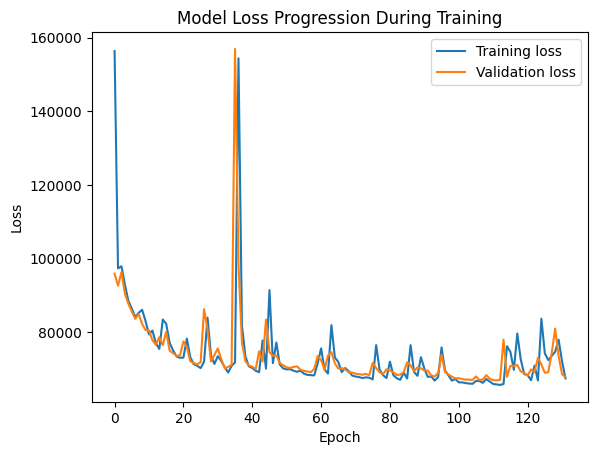

In [27]:
plt.plot(epochs_info.history['loss'])
plt.plot(epochs_info.history['val_loss'])
plt.title("Model Loss Progression During Training")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(["Training loss", "Validation loss"])
plt.show()

528/528 [==============================] - 0s 822us/step


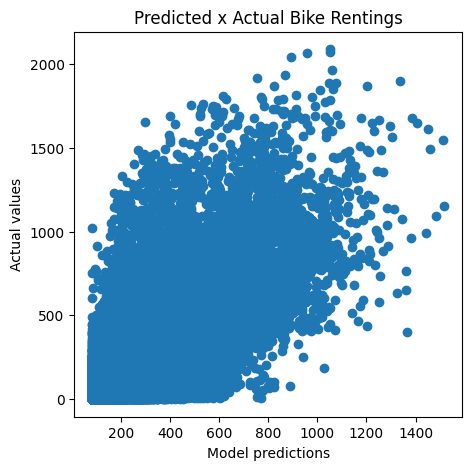

In [28]:
y_pred = neural_regressor.predict(X_test)

plt.figure(figsize=(5, 5))
plt.scatter(y_pred, y_test)
plt.title("Predicted x Actual Bike Rentings")
plt.xlabel("Model predictions")
plt.ylabel("Actual values")
plt.show()


In [29]:
# Use the off-the-shelf MAE, MSE, RMSE and R2 score functions from
# Scikit-learn.
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Get number of instances and features and calculate the adjusted
# R2 score.
n = X_test.shape[0]
k = X_test.shape[1]
adjusted_r2 = 1 - ((1 - r2) * (n - 1)) / (n - k - 1)

print("Mean Absolute Error: ", mae)
print("Mean Squared Error: ", mse)
print("Root Mean Squared Error: ", rmse)
print("R2 score: ", r2)
print("Adjusted R2 score: ", adjusted_r2)

Mean Absolute Error:  186.52670282252652
Mean Squared Error:  66506.3310461315
Root Mean Squared Error:  257.888214244334
R2 score:  0.43170709710901456
Adjusted R2 score:  0.4301194980579045


## Hyperparameters

In [41]:
from scikeras.wrappers import KerasRegressor


In [ ]:
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
#from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import GridSearchCV

# Define a function to create the model
def create_model(learning_rate=0.001, num_neurons=120):
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Dense(num_neurons, activation='relu',input_shape=(X_train.shape[1],)))
    model.add(tf.keras.layers.Dense(num_neurons, activation='relu'))
    model.add(tf.keras.layers.Dense(num_neurons, activation='relu'))
    model.add(tf.keras.layers.Dense(units=1, activation='linear'))
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss=tf.keras.losses.mean_absolute_error, metrics=['mse'])
    return model

# Create a KerasRegressor based on the create_model function
keras_model = KerasRegressor(build_fn=create_model, verbose=0, learning_rate=0.1, num_neurons=32)

# Define hyperparameters grid
param_grid = {
    'learning_rate': [0.1, 0.01, 0.001],
    'num_neurons': [32, 64, 128],
    'epochs': [100, 150, 200]
}

# Perform grid search
grid = GridSearchCV(estimator=keras_model, param_grid=param_grid)
grid_result = grid.fit(X_train, y_train)

# Print results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/scikeras

## Predictions

In [ ]:
#miniholdout
df_use=pd.read_csv('https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/biking_holdout_test_mini.csv')
#holdout dataset
df_use1=pd.read_csv('https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/bikes_december.csv')

df_use1.info()

In [ ]:
#df_use['season'] = df_use['season'].map({1: 'winter', 2: 'spring', 3: 'summer', 4: 'fall'})

In [ ]:
#df_use = pd.get_dummies(df_use, columns=['season'], prefix='', prefix_sep='')

In [ ]:
df_use['dteday']= pd.to_datetime(df_use['dteday'])

In [ ]:
df_use.columns

In [ ]:
df_use['df_day'] = df_use['dteday'].dt.day
df_use['df_month'] = df_use['dteday'].dt.month
df_use['df_year'] = df_use['dteday'].dt.year
df_use['df_weekday'] = df_use['dteday'].dt.weekday

In [ ]:
df_use.drop(['dteday'], axis=1)

In [ ]:
df_numerical_use = df_use[['temp_c', 'hum', 'windspeed']]

In [ ]:
df_categorical_use = df_use[['season', 'df_year', 'df_month', 'holiday', 'df_weekday',
                               'workingday', 'weathersit']]

In [ ]:
one_hot = OneHotEncoder()
df_categorical_use = one_hot.fit_transform(df_categorical_use).toarray()
df_categorical_use = pd.DataFrame(df_categorical_use)

In [ ]:
df_categorical_use

In [ ]:
df_categorical_use.reset_index(drop=True, inplace=True)
df_numerical_use.reset_index(drop=True, inplace=True)

In [ ]:
concatenated_df_use = pd.concat([df_categorical_use, df_numerical_use], axis=1)

In [ ]:
df_onehot_use=concatenated_df_use
df_onehot_use

In [ ]:
print(df_onehot_use.shape)

In [ ]:
print(neural_regressor.input_shape)

In [ ]:
df_onehot_use = np.reshape(df_onehot_use, (df_onehot_use.shape[0], 47))

In [ ]:
predictions_use = neural_regressor.predict(df_onehot_use)

In [ ]:
predictions = predictions_use.reshape(-1)
# Create a DataFrame with predictions
predictions_df1 = pd.DataFrame({'predictions': predictions})

# Save predictions to a CSV file
predictions_df1.to_csv('team8-module3-predictions.csv', index=False)